In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_excel("EnergyData.xlsx")
print(df)

       SystemLoad       Date  Hour
0           12230 2004-01-01     1
1           11534 2004-01-01     2
2           11038 2004-01-01     3
3           10777 2004-01-01     4
4           10764 2004-01-01     5
...           ...        ...   ...
43843       18563 2008-12-31    20
43844       17825 2008-12-31    21
43845       17038 2008-12-31    22
43846       16199 2008-12-31    23
43847       15438 2008-12-31    24

[43848 rows x 3 columns]


In [2]:
import datetime as dt
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
import numpy as np
from datetime import time
from random import random
import random




def pulse_attack(df,dd,mm,yy,attack_point_time,pulse_parameter):
    row_num = []
    new_date=dt.date(yy,mm,dd)
    random_parameter=0
    for i in df.index:
        if(df['Date'][i]==new_date ):
            if(df['Hour'][i]==attack_point_time):
                df['SystemLoad'][i]=df['SystemLoad'][i]*(1+pulse_parameter)
                details=[]
                details.append(df['Date'][i])
                details.append(df['Hour'][i])
                row_num.append(details)                

    print("Random Attack succesfully done on following data points : ")
    print(row_num)

    

def ramping_attack(ramping_parameter,df,dd,mm,yy,starting_time,ending_time):
    row_num =[]
    new_date = dt.date(yy,mm,dd)
    avg_time=starting_time+ending_time
    avg_time=avg_time/2    
    for i in df.index:

        if(df['Date'][i]==new_date):
            if(df['Hour'][i]>starting_time and df['Hour'][i]<avg_time):
                df['SystemLoad'][i]=df['SystemLoad'][i]*(1+ramping_parameter*(df['Hour'][i]-starting_time))
                details=[]
                details.append(df['Date'][i])
                details.append(df['Hour'][i])
                row_num.append(details)       
            if(df['Hour'][i]>avg_time and df['Hour'][i]<ending_time):
                df['SystemLoad'][i]=df['SystemLoad'][i]*(1+ramping_parameter*(ending_time-df['Hour'][i]))
                details=[]
                details.append(df['Date'][i])
                details.append(df['Hour'][i])
                row_num.append(details)                
    print("Ramping Attack succesfully done on following data points : ")
    print(row_num)
    
    
    
    
def random_attack(df,dd,mm,yy,starting_time,ending_time):
    row_num = []
    new_date=dt.date(yy,mm,dd)
    random_parameter=0
    for i in df.index:
        if(df['Date'][i]==new_date ):
            if(df['Hour'][i]>starting_time and df['Hour'][i]<ending_time):
                if(random_parameter<df['SystemLoad'][i]):
                    random_parameter=df['SystemLoad'][i]
                
                
    random_parameter=random_parameter/2                                                      
                
    for i in df.index:
        if(df['Date'][i]==new_date):
            if(df['Hour'][i]>starting_time and df['Hour'][i]<ending_time):
                df['SystemLoad'][i]=df['SystemLoad'][i]+random_parameter*random.random()
                details=[]
                details.append(df['Date'][i])
                details.append(df['Hour'][i])
                row_num.append(details)
    print("Random Attack succesfully done on following data points : ")
    print(row_num)   


def scaling_attack(scaling_parameter,df,dd,mm,yy,starting_time,ending_time):
    row_num=[]
    
    new_date = dt.date(yy,mm,dd)
    for i in df.index:
        if(df['Date'][i]==new_date and df['Hour'][i]>=starting_time and df['Hour'][i]<=ending_time):
            df['SystemLoad'][i]=df['SystemLoad'][i]*(1+scaling_parameter)
            details=[]
            details.append(df['Date'][i])
            details.append(df['Hour'][i])
            row_num.append(details)
    print("Scaling Attack succesfully done on following data points : ")
    print(row_num)    

In [3]:
x_before_attack = []
y_before_attack = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

x_after_attack = []
y_after_attack = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

def get_values(df,dd,mm,yy):
    data = []
    new_date=dt.date(yy,mm,dd)
    print(new_date)
    
    for i in df.index:
#         yy1=int(df['Date'][i][0:4])
#         mm1=int(df['Date'][i][5:7])
#         dd1=int(df['Date'][i][8:10])
#         typecasted_date=dt.date(yy1,mm1,dd1)
        if(df['Date'][i]==new_date ):
            
            data.append(df['SystemLoad'][i])
#     print(data)                
    return data;



x_before_attack = get_values(df,5,1,2005)

ramping_attack(0.5,df,5,1,2005,2,10)

x_after_attack = get_values(df,5,1,2005)


print(x_before_attack)
print(".....")
print(x_after_attack)





    

2005-01-05


<ipython-input-2-88704b8b5d6b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SystemLoad'][i]=df['SystemLoad'][i]*(1+ramping_parameter*(df['Hour'][i]-starting_time))
<ipython-input-2-88704b8b5d6b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SystemLoad'][i]=df['SystemLoad'][i]*(1+ramping_parameter*(ending_time-df['Hour'][i]))


Ramping Attack succesfully done on following data points : 
[[Timestamp('2005-01-05 00:00:00'), 3], [Timestamp('2005-01-05 00:00:00'), 4], [Timestamp('2005-01-05 00:00:00'), 5], [Timestamp('2005-01-05 00:00:00'), 7], [Timestamp('2005-01-05 00:00:00'), 8], [Timestamp('2005-01-05 00:00:00'), 9]]
2005-01-05
[12086, 11611, 11419, 11410, 11712, 12935, 15282, 16837, 17151, 17379, 17660, 17742, 17704, 17731, 17616, 17699, 18856, 19966, 19790, 19252, 18429, 17170, 15567, 14056]
.....
[12086, 11611, 17128, 22820, 29280, 12935, 38205, 33674, 25726, 17379, 17660, 17742, 17704, 17731, 17616, 17699, 18856, 19966, 19790, 19252, 18429, 17170, 15567, 14056]


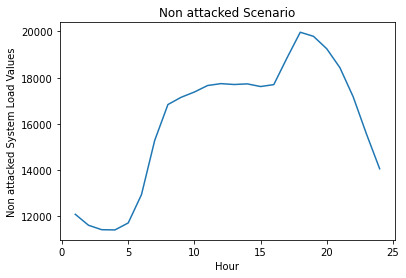

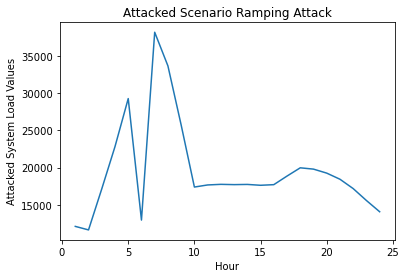

In [4]:
import matplotlib.pyplot as plt

plt.plot(y_before_attack,x_before_attack)
plt.ylabel('Non attacked System Load Values')
plt.xlabel('Hour')
plt.title('Non attacked Scenario')
plt.show()



plt.plot(y_after_attack,x_after_attack)
plt.ylabel('Attacked System Load Values')
plt.xlabel('Hour')
plt.title('Attacked Scenario Ramping Attack')
plt.show()










